In [1]:
# Часть 1

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Тестовое задание - tz_data.csv')
data.head()

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296


In [3]:
data = data.drop(['good (1)'], axis=1)

In [4]:
data = data.dropna()

In [5]:
data = data.drop_duplicates(subset=['area', 'keyword'])

In [6]:
data['i'] = range(len(data))
data = data.set_index('i')

In [7]:
for i in range(len(data)):
    if not data['count'][i].isdigit():
        data = data.drop(labels = [i], axis = 0)

In [8]:
data['count'] = data['count'].astype(int)

In [9]:
data['i'] = range(len(data))
data = data.set_index('i')

In [14]:
colors = ['#17becf', '#bcbd22', '#7f7f7f', '#e377c2', '#8c564b', '#9467bd', '#d62728', '#2ca02c', '#ff7f0e', '#1f77b4']
data['color'] = ''
c = 0
data.loc[0, 'color'] = colors[c] 

for i in range(1, len(data)):
    if data['area'][i] == data['area'][i - 1] and data['cluster'][i] == data['cluster'][i - 1]:
        data.loc[i, 'color'] = colors[c]
    elif data['area'][i] == data['area'][i - 1] and data['cluster'][i] != data['cluster'][i - 1]:
        c += 1
        data.loc[i, 'color'] = colors[c]
    elif data['area'][i] != data['area'][i - 1]:
        c = 0
        data.loc[i, 'color'] = colors[c]       

In [15]:
data = data.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending = [True, True, True, False])
data

,area,cluster,cluster_name,keyword,count,x,y,color
i,,,,,,,,
103,ar\vr,0.0,Кластер 0,written conflict fabulous,1443,2.991167,7.106798807182176,#17becf
105,ar\vr,0.0,Кластер 0,reservations linking,751,10.195602,12.259495712252914,#17becf
104,ar\vr,0.0,Кластер 0,interfaces neutral,586,10.443533,13.809914970161072,#17becf
106,ar\vr,0.0,Кластер 0,committees parallel,173,6.735260,3.613982972088637,#17becf
107,ar\vr,1.0,Кластер 1,postcards looked republic detector,1397,10.474474,6.220011967033064,#bcbd22
...,...,...,...,...,...,...,...,...
97,worlds,2.0,Кластер 2,ringtone parental,471,11.723895,4.363994491947961,#7f7f7f
99,worlds,2.0,Кластер 2,recipient traffic,236,5.593629,0.5533676310113189,#7f7f7f
102,worlds,3.0,Кластер 3,immunology plates,1653,2.407028,7.65152738334079,#e377c2


In [103]:
writer = pd.ExcelWriter('output.xlsx')
data.to_excel(writer)
writer.save()

No handles with labels found to put in legend.


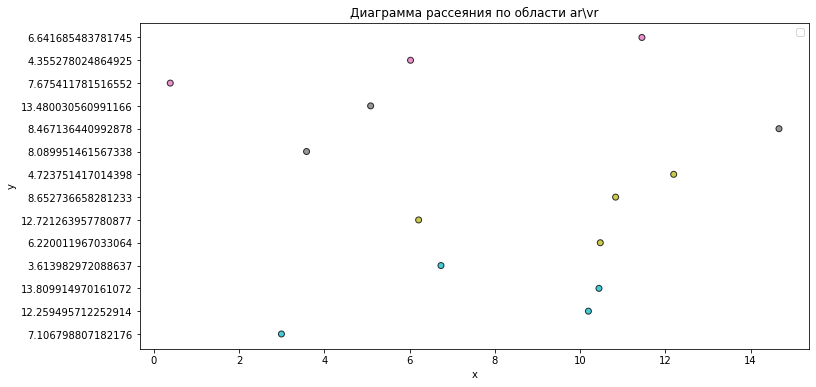

No handles with labels found to put in legend.


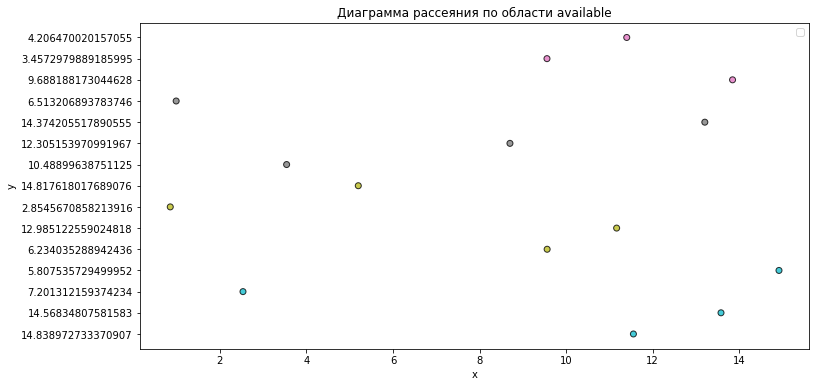

No handles with labels found to put in legend.


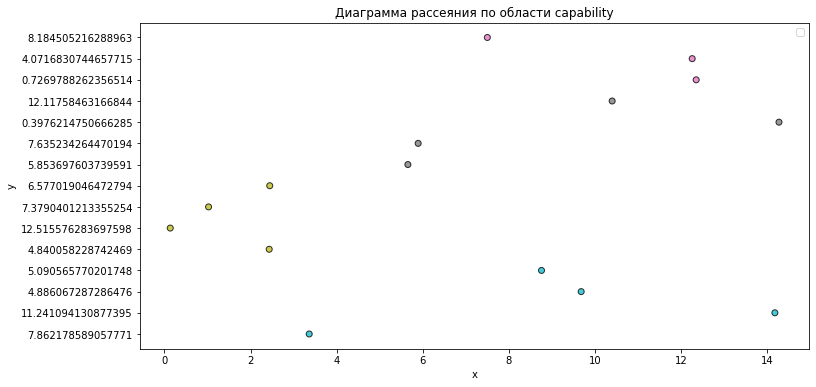

No handles with labels found to put in legend.


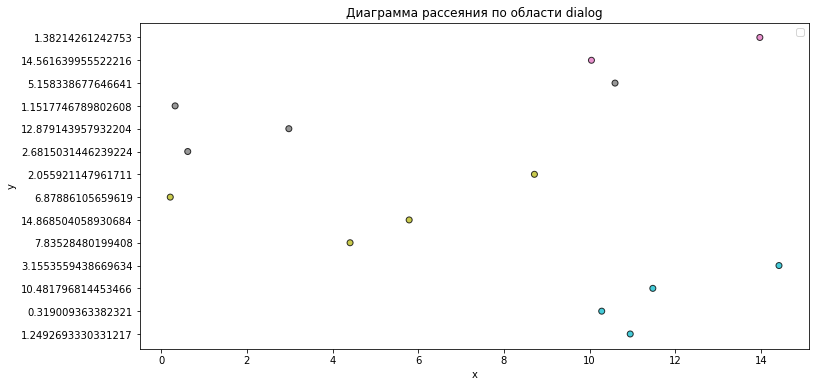

No handles with labels found to put in legend.


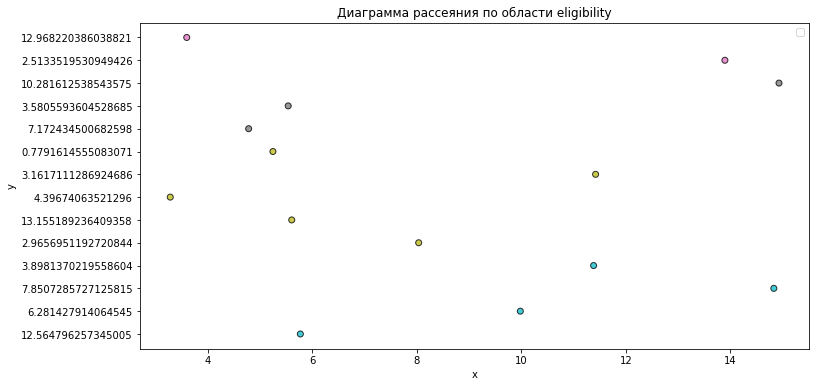

No handles with labels found to put in legend.


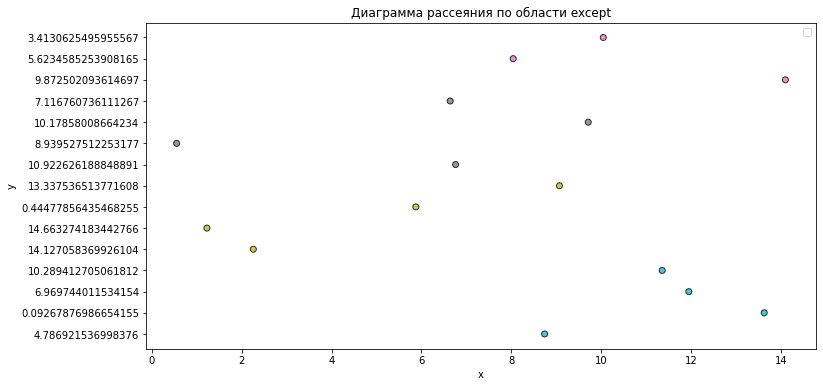

No handles with labels found to put in legend.


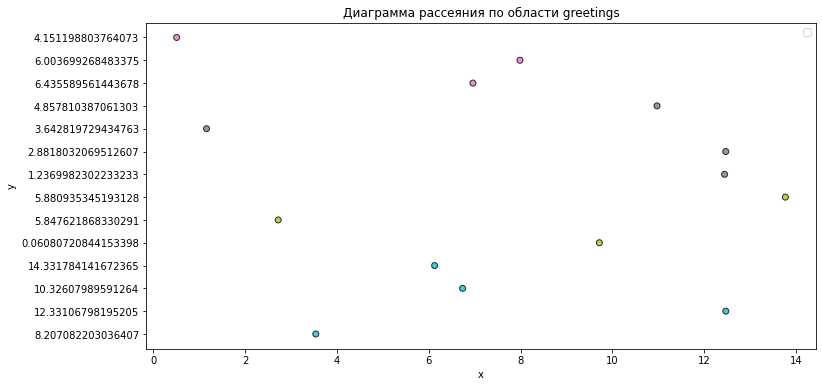

No handles with labels found to put in legend.


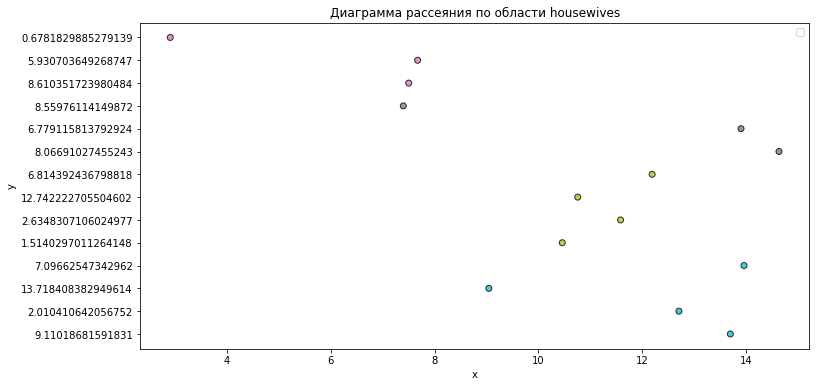

No handles with labels found to put in legend.


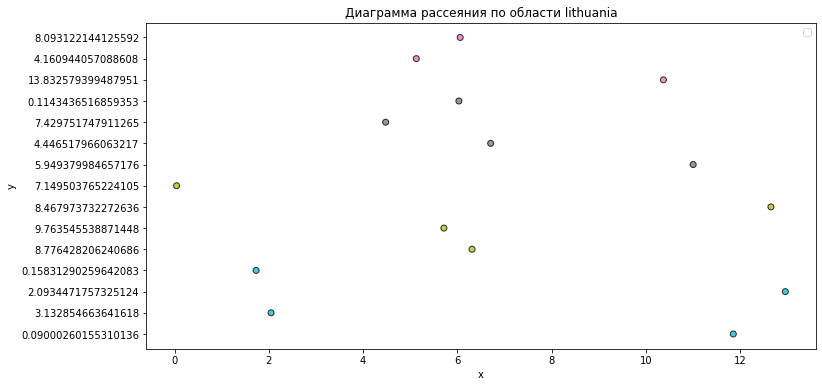

No handles with labels found to put in legend.


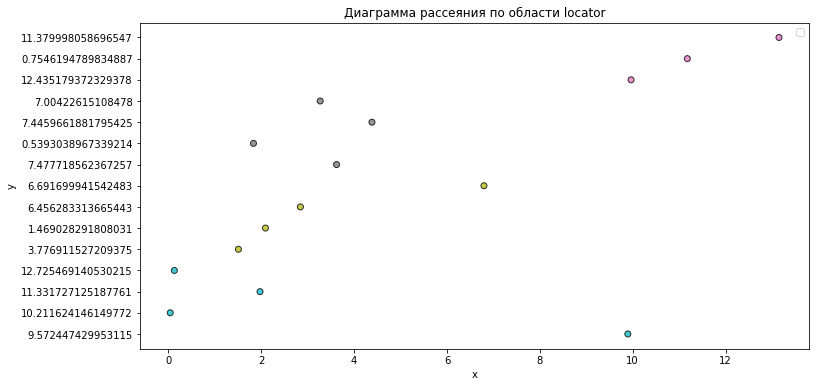

No handles with labels found to put in legend.


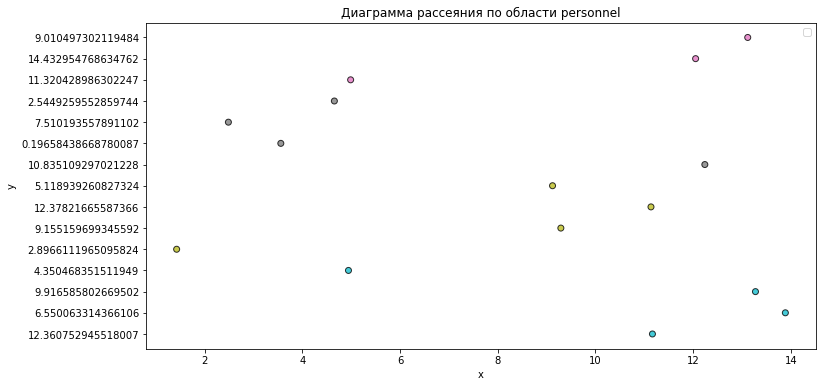

No handles with labels found to put in legend.


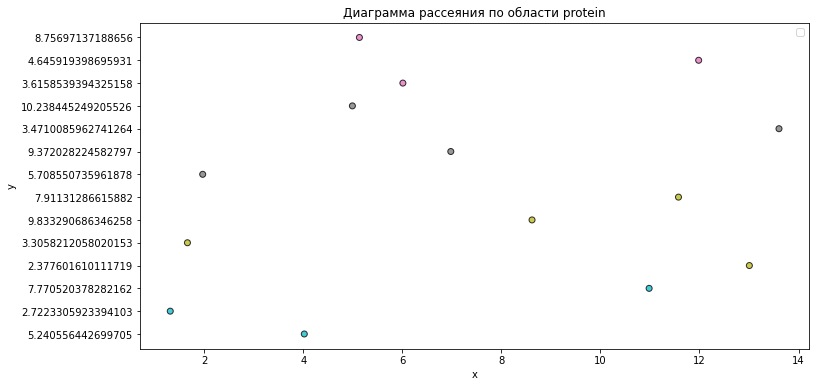

No handles with labels found to put in legend.


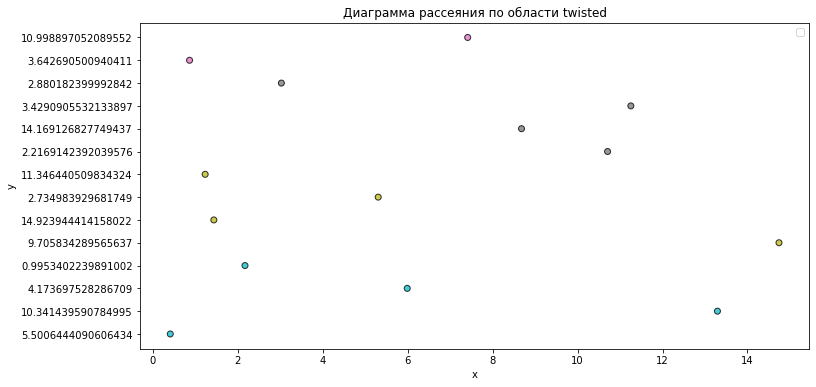

No handles with labels found to put in legend.


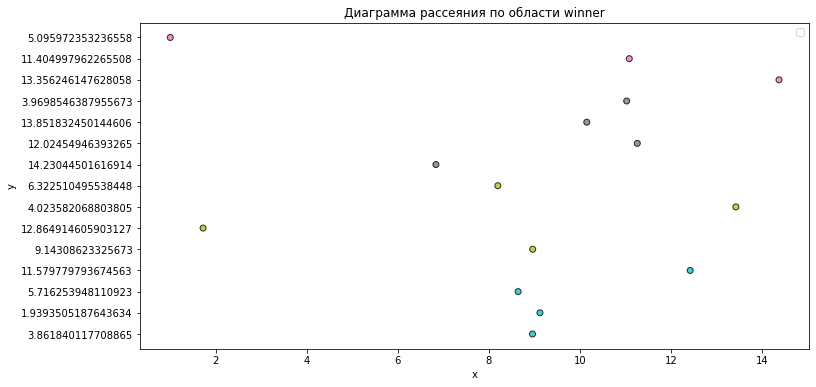

No handles with labels found to put in legend.


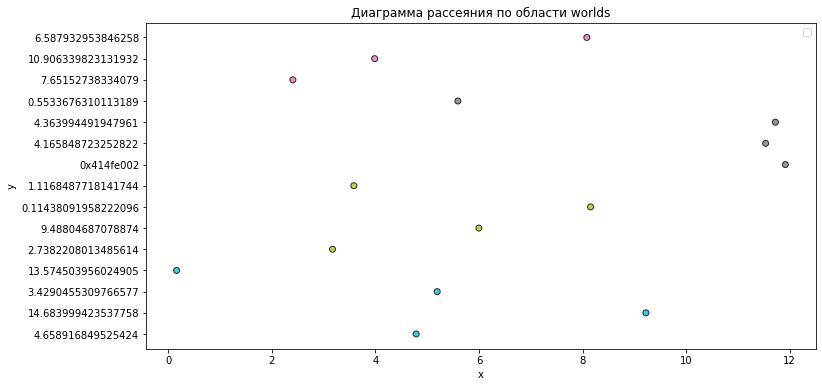

In [104]:
# Часть 2

areas = list(data.area.unique())

for a in areas:
    df = data[data['area'] == a]
    title = 'Диаграмма рассеяния по области '+ a

    fig, ax = plt.subplots(figsize=(12,6))
    plt.scatter(df['x'], df['y'], c=df['color'],
                   marker = 'o',
                   edgecolors = 'black',
                   alpha = 0.8)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    ax.legend()

    plt.show()